# <center> Red wine quality analysis <center>

## <center> Introduction <center>

Welcome to this Jupyter Notebook where we delve into the red wine quality analysis using statistical inference and regression modeling. In this exploration, we aim to uncover the factors that influence the perceived quality of red wines based on physicochemical properties. 

## <center> Analysis objectives <center>

Our primary goal is to build an explanatory model for our dataset. By employing statistical methods and regression techniques, we seek to:

- Identify which physicochemical variables significantly influence wine quality.
- Interpret the impact of these variables on the perceived quality of red wines.
- Validate our findings through statistical analysis and model evaluation.

### <center> Proposed hypothesis <center>

Null Hypothesis (H0)<br>
salts (chlorides) content has no significant effect on wine quality.<br>
𝐻0: β chlorides = 0<br>
​<br>
Alternative Hypothesis (H1)<br>
salts (chlorides) content has a significant effect on wine quality.<br>
𝐻1:β chlorides != 0<br>
<br>
We will set significance level to 0.05<br>

## <center> Dataset information <center>

### <center> Dataset description <center>

The dataset contains the following columns:<br>

- `fixed acidity`: Tartaric acid content in wine. Tartaric acid itself has a sour taste, but Wines with higher levels of tartaric acid tend to have a crisper and more refreshing acidity. This acidity is crucial for balancing the wine's flavors and providing structure. Typical value range is 4-6 g/l<br>

- `volatile acidity`: Acetic acid content in wine. Acetic acid imparts a sharp, vinegar-like sourness to wine when present in higher amounts. While a small amount of acetic acid can contribute to wine complexity, higher concentrations are generally undesirable and considered a flaw. Typical value range is 0.5-0.8 g/l. EU limit is 1.3 g/l.<br>

- `citric acid`: Citric acid content in wine. When present in appropriate amounts, contributes positively to the sensory characteristics and stability of wine. It adds a bright acidity that can enhance fruit flavors and freshness, contributing to a well-balanced and enjoyable wine experience. Typical value range is 0.2-0.5 g/l<br>

- `residual sugar`: Residual sugar content in wine. Residual sugar plays a significant role in shaping the taste, mouthfeel, and overall style of wine. Its presence can range from imperceptible in dry wines to pronounced in sweet wines. Typical value range depends on dryness of wine. Dry wines may have 0 g/l and sweet ones 25+ g/l.<br>

- `chlorides`: Chloride content in wine. Chlorides in wine contribute to its taste complexity, sensory balance, and overall quality. While they typically contribute positively when present in appropriate amounts, monitoring and managing chloride levels are important to achieve desired flavor profiles and ensure wine quality. Typical value range is 0.02-0.3 g/l. Most places regulate at 0.5g/l as a maximum allowed value.<br>

- `free sulfur dioxide`: Free sulfur dioxide content in wine. Free sulfur dioxide is a critical component in winemaking for its preservative and protective qualities. When managed properly, it contributes positively to the wine's aroma, flavor preservation, and overall quality, ensuring that the wine reaches consumers in a stable and enjoyable condition. <br>

- `total sulfur dioxide`: Total sulfur dioxide content in wine. While both free and total SO2 measurements involve sulfur dioxide in wine, they serve different purposes in winemaking. Free SO2 is the active preservative and antioxidant, while total SO2 gives a complete assessment of all forms of SO2 present, including those that are bound and not immediately active in preserving the wine. Accoding to regulations in EU this value should not be over 350 g/l.<br>

- `density`: Density of wine. Density measurements are used as quality indicators in wine production and analysis. They can help assess fermentation completeness, potential alcohol levels, and sometimes indicate the presence of residual sugars or other abnormalities.<br>

- `pH`: pH value of wine. pH is a fundamental factor in wine chemistry that affects taste, microbial stability, color, and overall quality. Typical value range is 3.3-3.8 g/l<br>

- `sulphates`: Potassium sulphate content in wine. Potassium sulfate in wine primarily contributes potassium as a nutrient for yeast and potentially impacts pH and SO₂ levels. <br>

- `alcohol`: Alcohol content of wine. Alcohol content is a critical component of wine that impacts its flavor, body, aging potential, and overall consumer experience. <br>

- `quality`: Quality rating of the wine (score between 0 and 10).<br>

Each row in the dataset represents a unique red wine sample with its corresponding physicochemical properties and quality rating.

### <center> Dataset collection <center>

We obtained the dataset from [Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data), where it is openly available for research and educational purposes.<br>
The dataset consists of 1599 observations, each representing a unique red wine sample.

## <center> Imports and data loading <center>

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
wine_data = pd.read_csv('./Datasets/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## <center> Data validation <center>

In [5]:
wine_data.shape

(1599, 12)

In [6]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
wine_data.duplicated().sum()

240

As we can see, there are 240 rows that are duplicated. Lets filter them out into new dataset and see if they are really true duplicates.

In [9]:
duplicated_rows = wine_data[wine_data.duplicated(keep=False)]
duplicated_rows.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
39,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
64,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


Even though the dataset description mentions 1599 unique wine entries, there are 240 instances where the data is exactly the same (potentially differing only by brand, although this information is unavailable). Therefore, we are dropping these duplicate rows as they do not provide additional insights.

In [10]:
wine_data.drop_duplicates(inplace=True)
wine_data.duplicated().sum()

0

## <center> Identifying and handling outliers <center>

To identify outliers we will be using 2 methods. Zscore, which calculates how many standart deviations away from mean each datapoint is and visual graphs which are self explanatory.

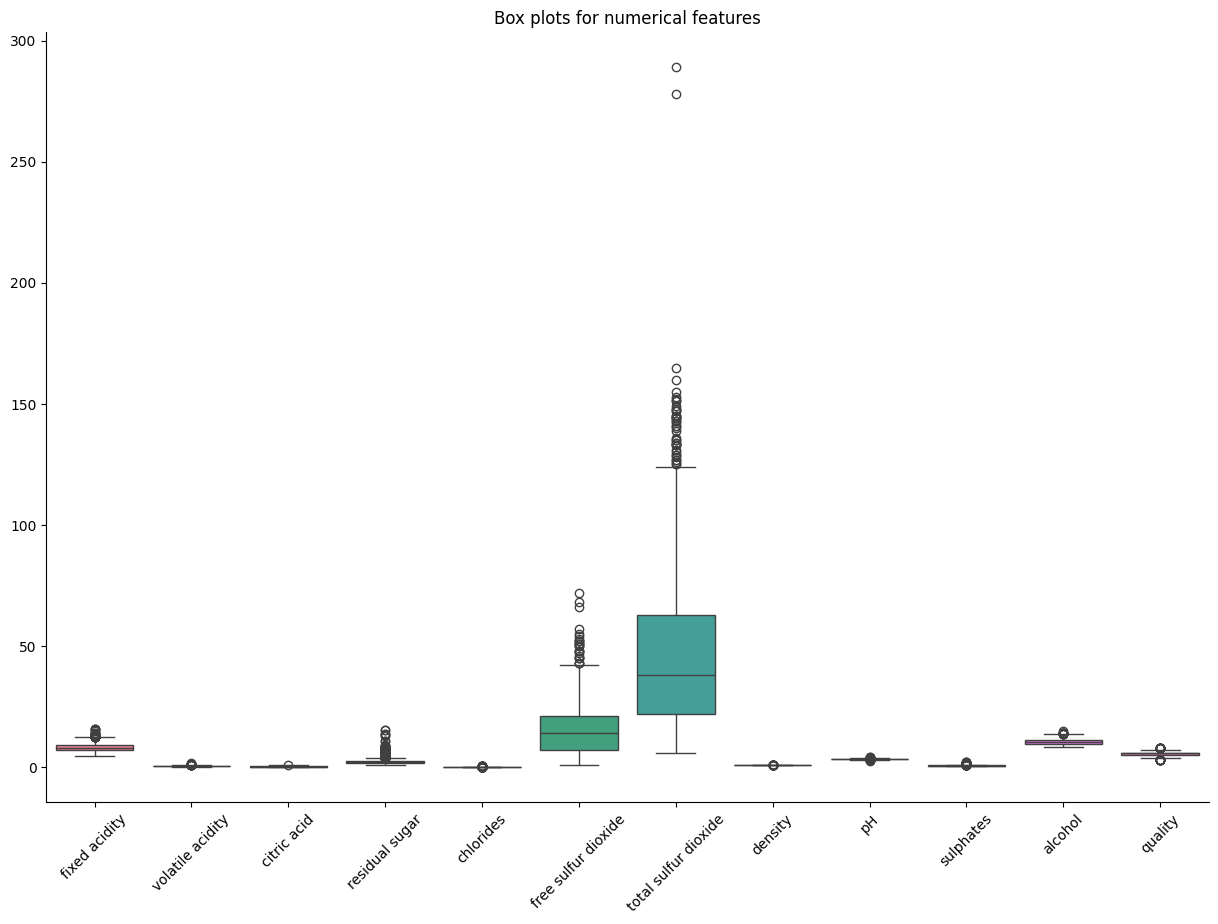

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=wine_data)
plt.xticks(rotation=45)
sns.despine()
plt.title('Box plots for numerical features')
plt.show()

Considering that there are quite a few outliers in both free sulfur dioxide and total sulfur dioxide, it's noteworthy that the maximum value of these outliers is under 300. Given that wine-making regulations dictate a maximum allowed value of 350, we will retain these data points.

In [12]:
z_scores = wine_data.apply(zscore)
outlier_indices = (z_scores.abs() > 5).any(axis=1)
outliers = wine_data[outlier_indices]
display(outliers)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
106,7.8,0.410,0.68,1.7,0.467,18.0,69.0,0.99730,3.08,1.31,9.3,5
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4


Even after filtering out data points that are 5 standard deviations away from the mean (where 99.99999% of data should fall within this range), we still find data points within allowable value ranges as specified in feature explanations, with a few exceptions. Therefore, we will filter out wines that exceed the regulated EU values for specific chemicals.

In [13]:
non_regulatory = wine_data[
    (wine_data['volatile acidity'] > 1.3) |
    (wine_data['chlorides'] > 0.5) |
    (wine_data['total sulfur dioxide'] > 350)
]
display(non_regulatory)
wine_data.drop(wine_data[wine_data.isin(non_regulatory.to_dict('list')).all(axis=1)].index, inplace=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
126,8.2,1.33,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.33,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
258,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5
1299,7.6,1.58,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3


## <center> Data standartization <center>

In [14]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(wine_data)
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = min_max_scaler.fit_transform(standardized_data)
columns = wine_data.columns
standardized_wine_data = pd.DataFrame(scaled_data, columns=columns)
standardized_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.517857,0.000000,0.068493,0.140659,0.140845,0.098940,0.567548,0.565217,0.139394,0.153846,0.4
1,0.283186,0.678571,0.000000,0.116438,0.189011,0.338028,0.215548,0.494126,0.295652,0.212121,0.215385,0.4
2,0.283186,0.571429,0.050633,0.095890,0.175824,0.197183,0.169611,0.508811,0.347826,0.193939,0.215385,0.4
3,0.584071,0.142857,0.708861,0.068493,0.138462,0.225352,0.190813,0.582232,0.260870,0.151515,0.215385,0.6
4,0.247788,0.482143,0.000000,0.061644,0.138462,0.169014,0.120141,0.567548,0.565217,0.139394,0.153846,0.4


Because we will try to perform regression, value ranges have strong influence on our coefficent values, for example fixed acidity will influance our model way more than citric acid, because of the huge gap in value range (fixed acidity may have 50 times bigger values than citric adic). For this reason we will standartize our dataset in advance.

In [15]:
standardized_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,0.328421,0.363941,0.344352,0.111284,0.165551,0.210061,0.144489,0.487419,0.391234,0.198617,0.312739,0.525554
std,0.153967,0.159337,0.245596,0.092745,0.099297,0.147031,0.118101,0.137293,0.133973,0.100582,0.166633,0.164058
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.241071,0.126582,0.068493,0.127473,0.084507,0.056537,0.406021,0.304348,0.133333,0.169231,0.400000
50%,0.292035,0.357143,0.329114,0.089041,0.147253,0.183099,0.113074,0.486784,0.391304,0.175758,0.276923,0.600000
75%,0.407080,0.464286,0.544304,0.116438,0.171429,0.281690,0.201413,0.569016,0.469565,0.242424,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <center> EDA <center>

In [16]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000,1354.000000
mean,8.311152,0.527614,0.272038,2.524742,0.087326,15.914328,46.890325,0.996709,3.309919,0.657718,10.432804,5.627770
std,1.739830,0.178458,0.194021,1.354080,0.045180,10.439211,33.422478,0.001870,0.154069,0.165960,1.083112,0.820288
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.090000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.240000,0.790000,15.500000,0.467000,72.000000,289.000000,1.003690,4.010000,1.980000,14.900000,8.000000


In [17]:
#sns.pairplot(wine_data)
#plt.show()

Even though this graph is quite cluttered, it provides several insights. Firstly, we can observe several potential correlations that need further investigation. Additionally, by examining the diagonal line, we can see distribution histograms. These histograms indicate that we have two types of distributions: standard and left-skewed. Features with left-skewed distributions will likely need to be transformed.

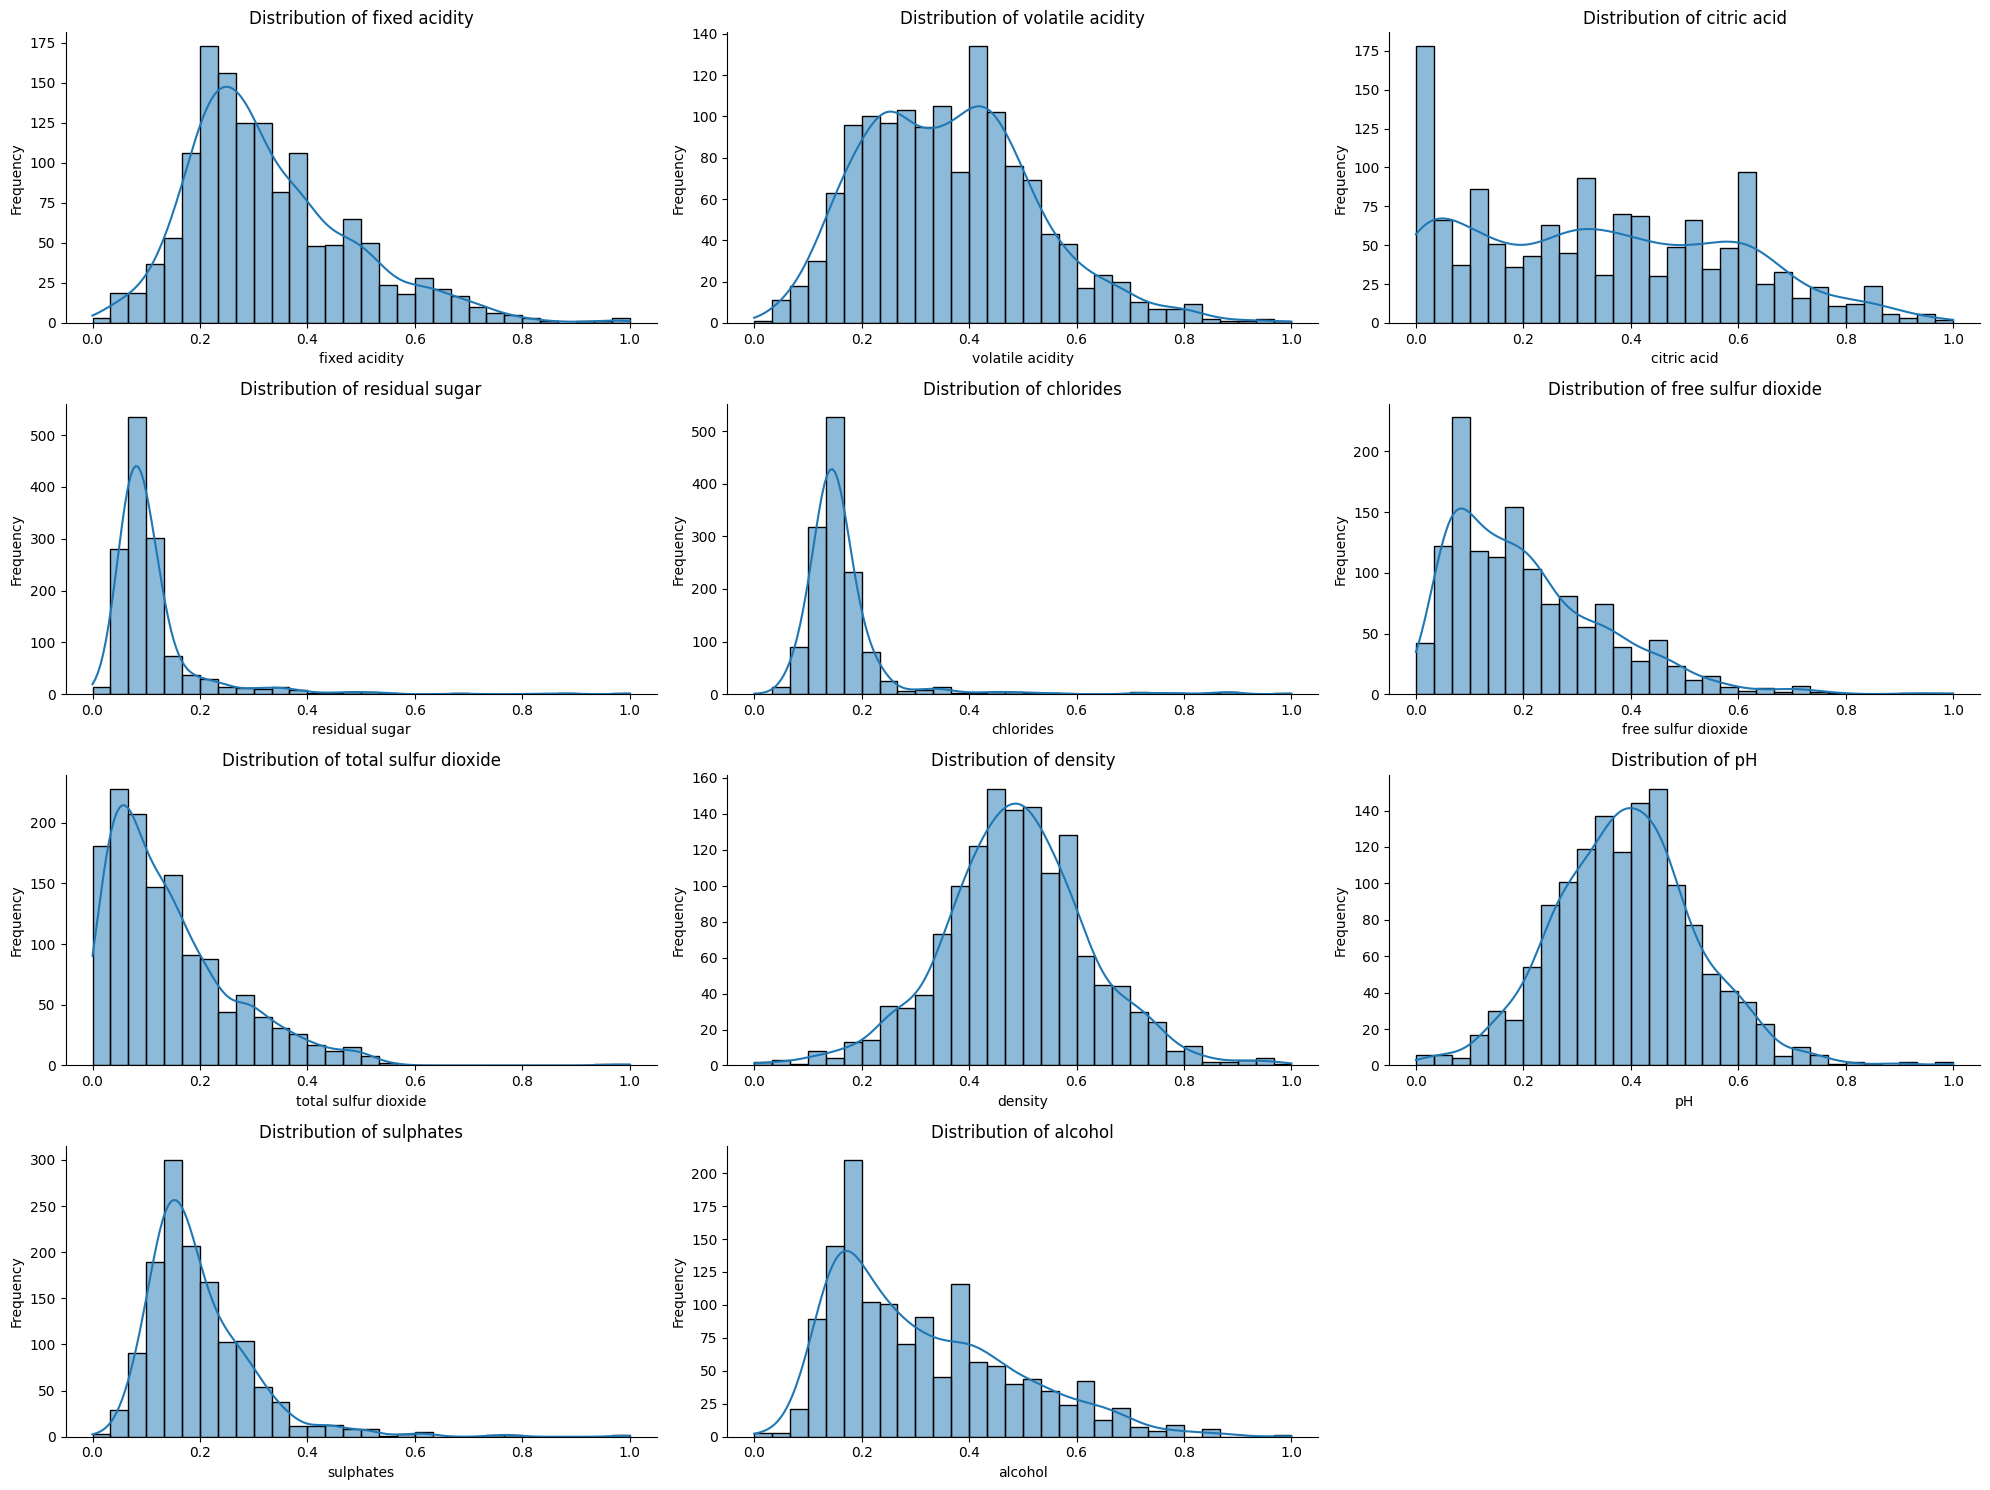

In [18]:
features = standardized_wine_data.columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    if feature != "quality":
        plt.subplot(4, 3, i + 1) 
        sns.histplot(standardized_wine_data[feature], bins=30, kde=True)
        sns.despine()
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

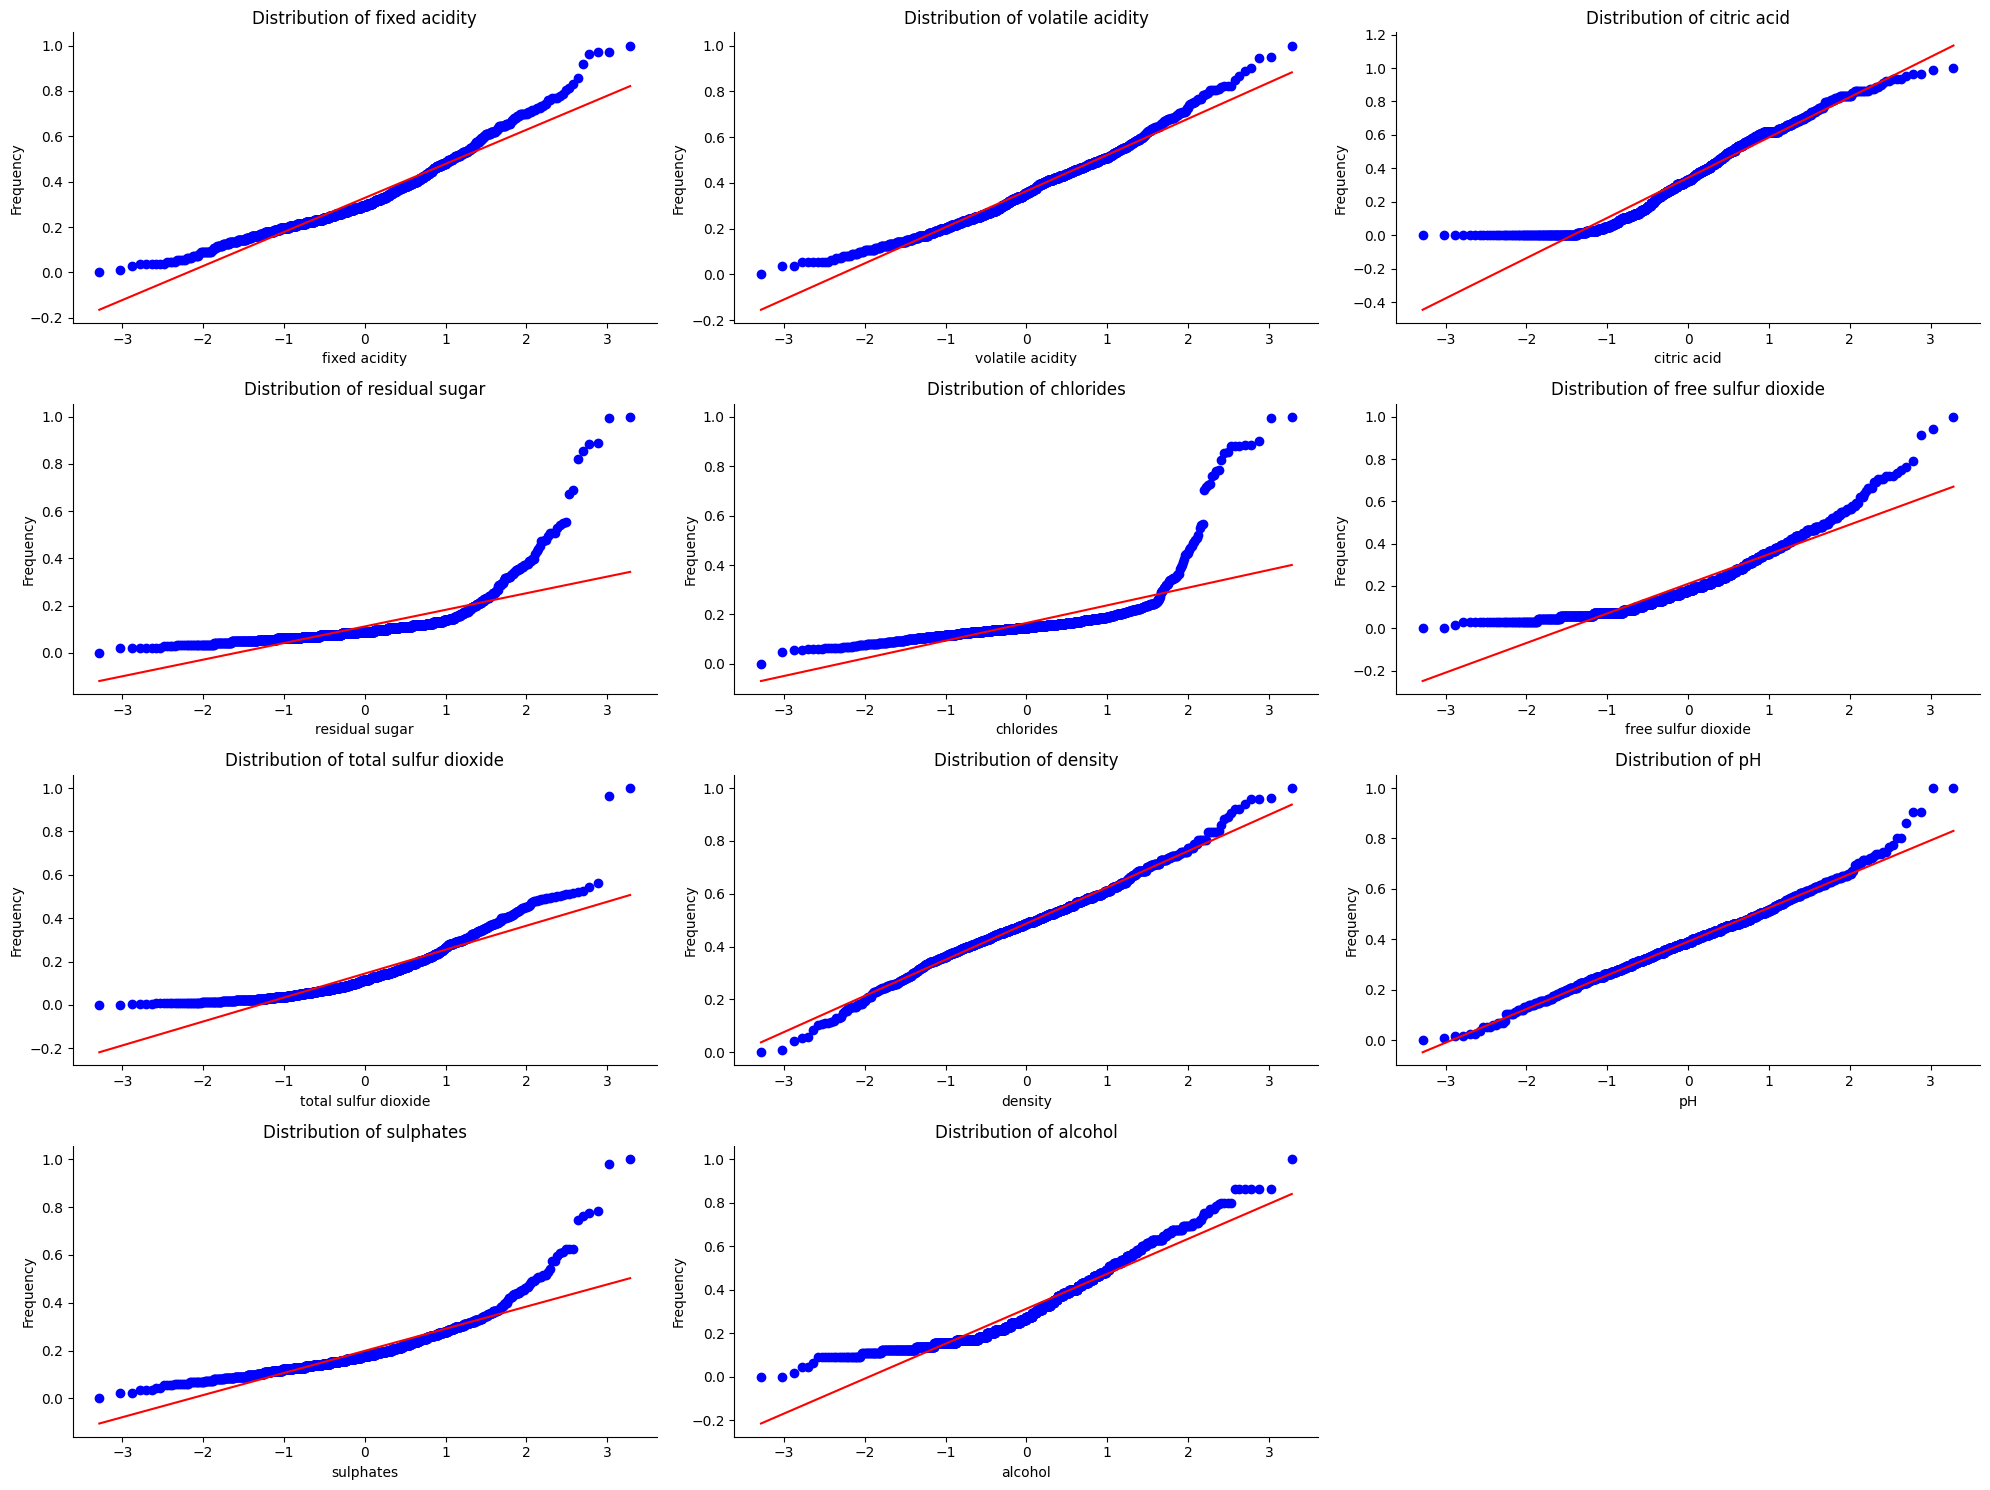

In [19]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    if feature != "quality":
        plt.subplot(4, 3, i + 1) 
        st.probplot(standardized_wine_data[feature].values, dist="norm", plot=plt)
        sns.despine()
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

As we can see from q-q plots, our datasets features cant be considered standartly distributed. Later on we will perform transformations to account for this.

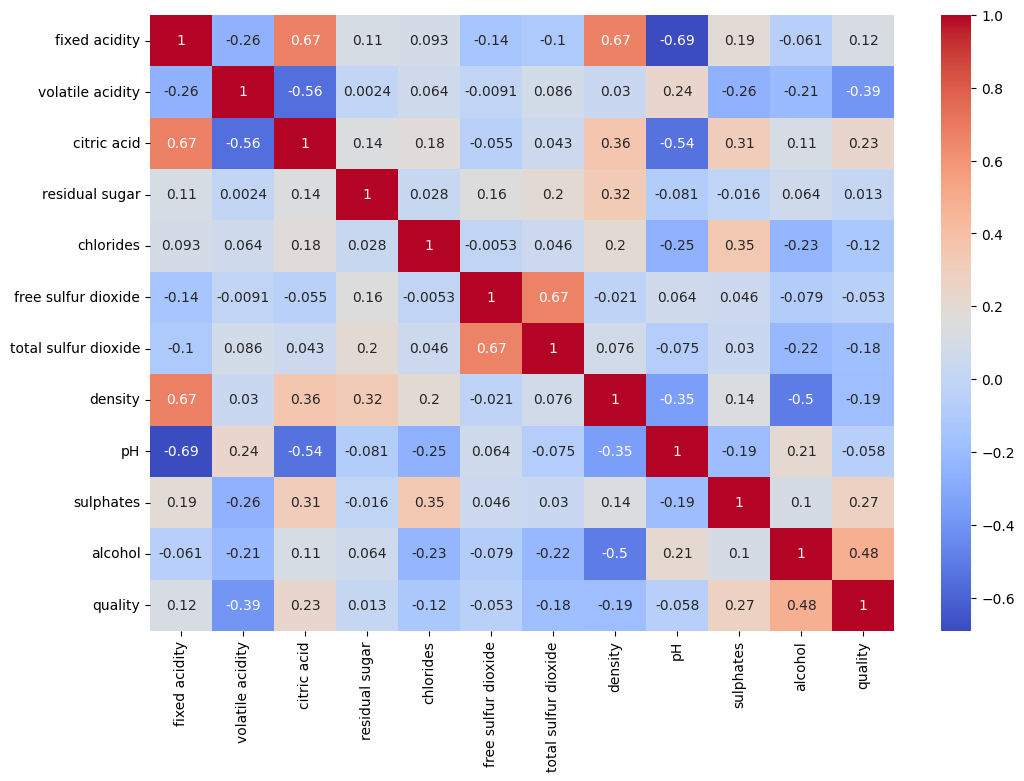

In [20]:
correlation_matrix = standardized_wine_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

What is considered a strong correlation is quite debated. Some literature says that it has to be >0.7, while others say that 0.67 is enough to be considered strong. For this analysis, we will consider a strong positive correlation when the value is >=0.67 and a strong negative correlation when the value is <-0.67. In this heatmap, we can see that there are four correlations that can be considered strong. Our only strong negative correlation is between pH and tartaric acid (fixed acidity), which implies that higher levels of tartaric acid significantly lower pH.<br>

On the other hand, there are three positive correlations. Tartaric acid has strong correlations with density and citric acid (both 0.67). This indicates that tartaric acid might be quite heavy and that it might be used extensively to balance out citric acid. The last strong positive correlation is between free sulfur dioxide and total sulfur dioxide. This seems quite logical because the total sulfur dioxide value includes the value of free sulfur dioxide. <br>

Additionally, in case we need to perform feature selection for regression models (in case of low interpretability), we can select features that have the strongest (not necessarily strong by theoretical definition) correlations.

In [21]:
X = standardized_wine_data.drop(["quality"], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0          fixed acidity  42.701765
1       volatile acidity  10.214881
2            citric acid   9.061127
3         residual sugar   3.961799
4              chlorides   5.073204
5    free sulfur dioxide   5.890477
6   total sulfur dioxide   5.418971
7                density  82.786783
8                     pH  24.739892
9              sulphates   6.790505
10               alcohol  13.134200


After conducting multicorrelarity inspection using variance inflation factor, we can see that there are some problems with our features. Overall VIF values are within desirable range, but two of them (fixed acidity and density) have vif values of >5. Before performing any transformations we will drop some features that are less important when looking into quality of wine.

In [22]:
standardized_wine_data.drop(["citric acid","free sulfur dioxide","density","pH","sulphates"], axis=1, inplace=True)

#### Dropping citric acid:<br>
Reason: Inabilaty to transform data into standart distribution. If we use this feature while its not transformed correctly it may dimisnish our modeling results.<br>
#### Dropping pH:<br>
Reason: pH measures the acidity or alkalinity of the wine, which can be indirectly perceived through other features such as fixed acidity and volatile acidity. Tasters may not directly sense pH but rather the overall acidic profile.<br>
Correlation: pH is highly collinear with fixed acidity and other acidity-related measures, which are more directly related to sensory perception.<br>
#### Dropping Density:<br>
Reason: The variation in density (from 0.99 to 1) is minimal and likely not perceptible to tasters. Density is often a proxy for sugar and alcohol content, which are already included as separate features.<br>
Redundancy: Since other variables like alcohol and residual sugar are more directly linked to what tasters perceive, density becomes less informative.<br>
#### Dropping Free Sulfur Dioxide:<br>
Reason: Total sulfur dioxide already encompasses the free sulfur dioxide, so it provides the necessary information about sulfur dioxide levels.<br>
Redundancy: Including both free and total sulfur dioxide can lead to multicollinearity without adding significant explanatory power for sensory-based quality assessments.<br>
#### Dropping sulphates: <br>
Reason: Primary usage is to 'feed' yeasts and does not provide taste profile.

In [23]:
X = standardized_wine_data.drop(["quality"], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                feature       VIF
0         fixed acidity  4.211516
1      volatile acidity  4.258110
2        residual sugar  2.638594
3             chlorides  3.569485
4  total sulfur dioxide  2.492462
5               alcohol  3.244973


now we can see that all of our features that are left in dataset have vif values of less than 5, which indicates that there are no problems with multicorrelarity. Now lets perform transformations and see how they effect our data.

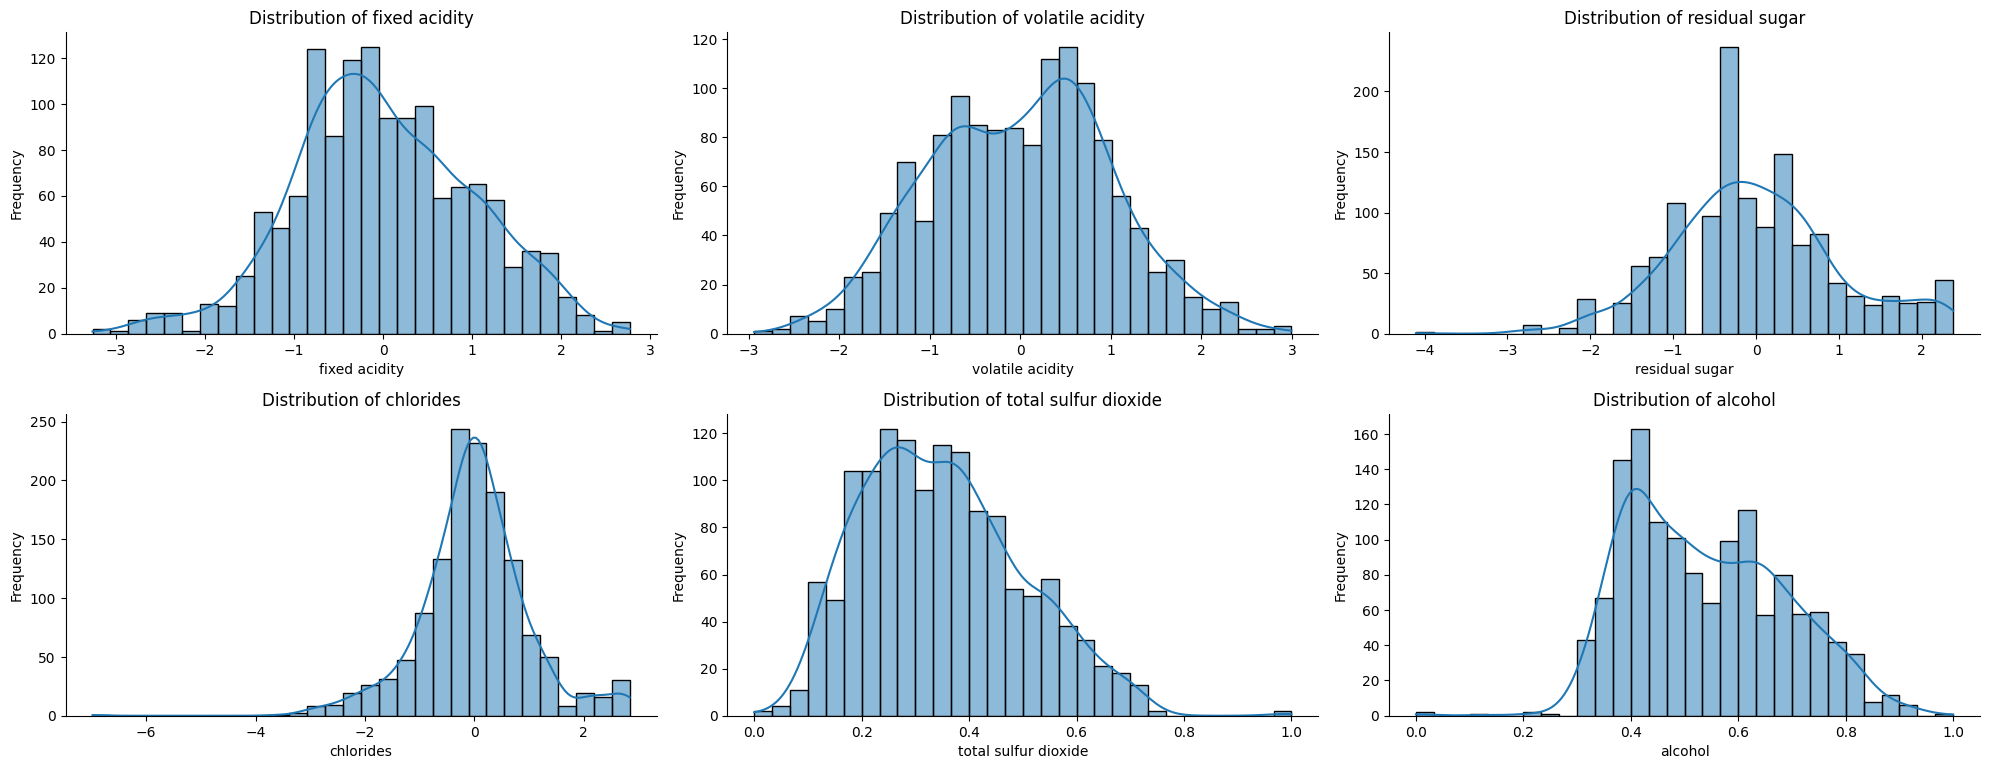

In [24]:
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
standardized_wine_data['fixed acidity'] = pt_yeo_johnson.fit_transform(standardized_wine_data[['fixed acidity']])
standardized_wine_data['volatile acidity'] = pt_yeo_johnson.fit_transform(standardized_wine_data[['volatile acidity']])
standardized_wine_data['residual sugar'] = pt_yeo_johnson.fit_transform(standardized_wine_data[['residual sugar']])
standardized_wine_data['chlorides'] = pt_yeo_johnson.fit_transform(standardized_wine_data[['chlorides']])
standardized_wine_data['total sulfur dioxide'] = np.sqrt(standardized_wine_data[['total sulfur dioxide']])
standardized_wine_data['alcohol'] = np.sqrt(standardized_wine_data[['alcohol']])
features = standardized_wine_data.columns

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    if feature != "quality":
        plt.subplot(4, 3, i + 1) 
        sns.histplot(standardized_wine_data[feature], bins=30, kde=True)
        sns.despine()
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

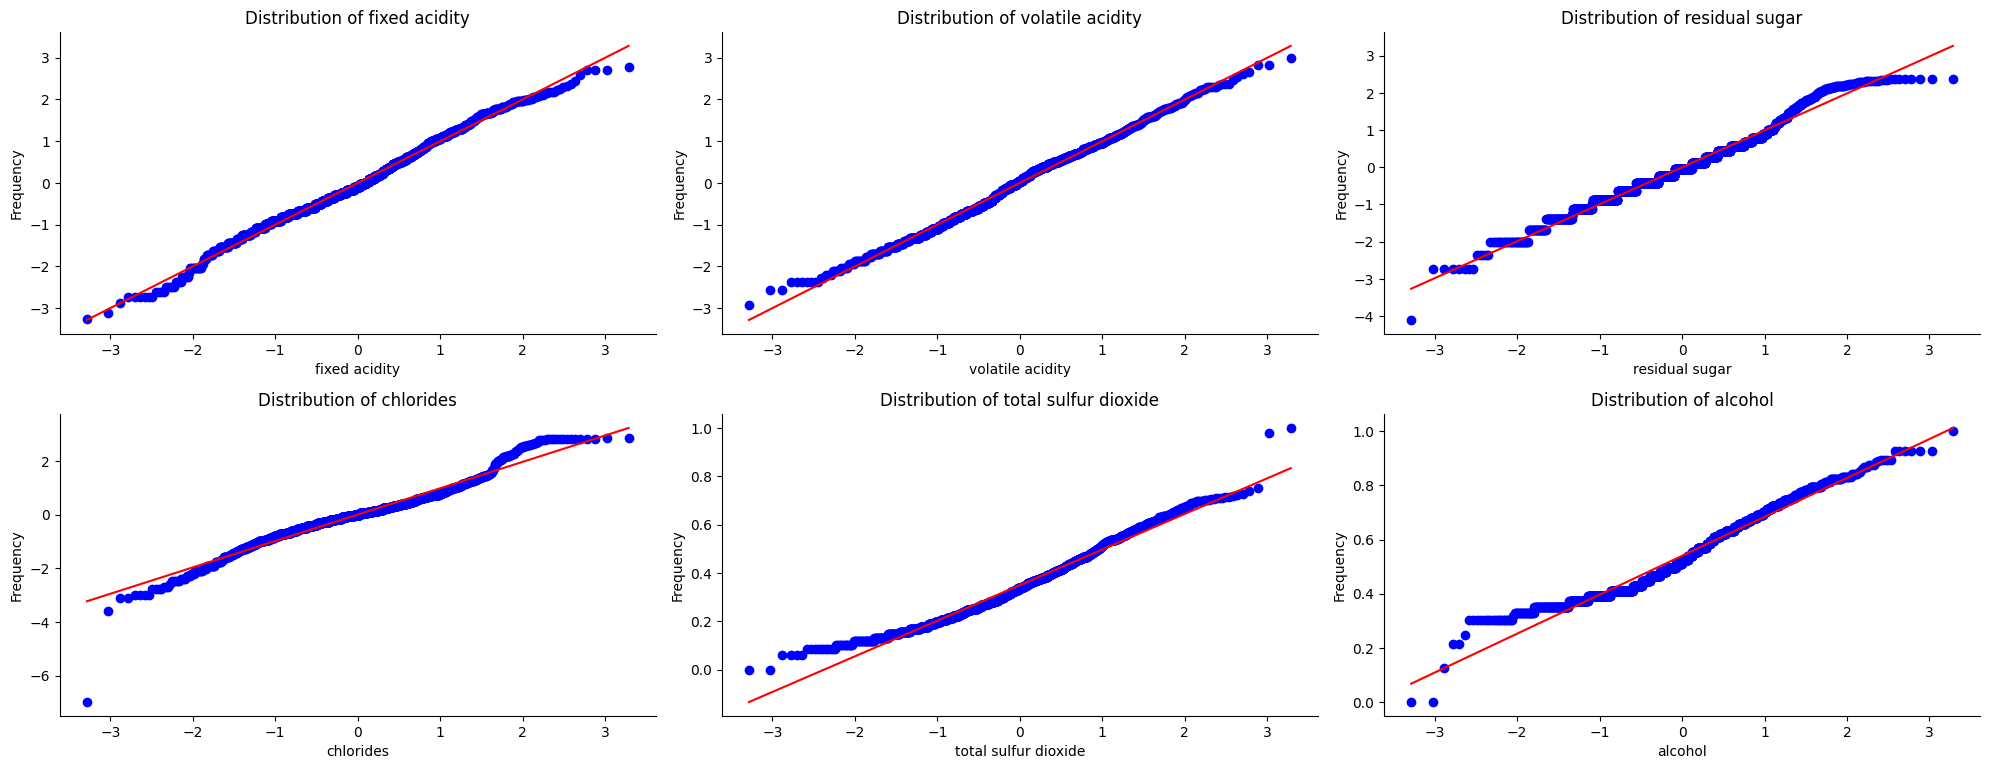

In [25]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    if feature != "quality":
        plt.subplot(4, 3, i + 1) 
        st.probplot(standardized_wine_data[feature].values, dist="norm", plot=plt)
        sns.despine()
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

after transforming our data we got distributions that are way closer to standart than before. Most of transformations were performed by "trial and error", with few exceptions because our data didint fit conditions required for transformation (like having negative values). Now we will split our dataset into training and testing parts (80-20) and fit model.

In [27]:
X = standardized_wine_data.drop(["quality"], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                feature       VIF
0         fixed acidity  1.241693
1      volatile acidity  1.163103
2        residual sugar  1.080655
3             chlorides  1.205523
4  total sulfur dioxide  4.238359
5               alcohol  4.259091


After all of the transformations we can see that our vif values are all below 5 which implies that we did not introduce any multicorrelarity by performing transformations.

In [26]:
train_df, test_df = train_test_split(standardized_wine_data, test_size=0.2, random_state=42)

In [28]:
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

Train dataset shape: (1083, 7)
Test dataset shape: (271, 7)


In [31]:
X_train = train_df.drop('quality', axis=1)  # Drop the target variable
y_train = train_df['quality']

X_test = test_df.drop('quality', axis=1)
y_test = test_df['quality']
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the model on training data
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print summary of the model
print(results.summary())
y_pred = results.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     83.64
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           5.39e-86
Time:                        11:32:15   Log-Likelihood:                 630.69
No. Observations:                1083   AIC:                            -1247.
Df Residuals:                    1076   BIC:                            -1212.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2995 

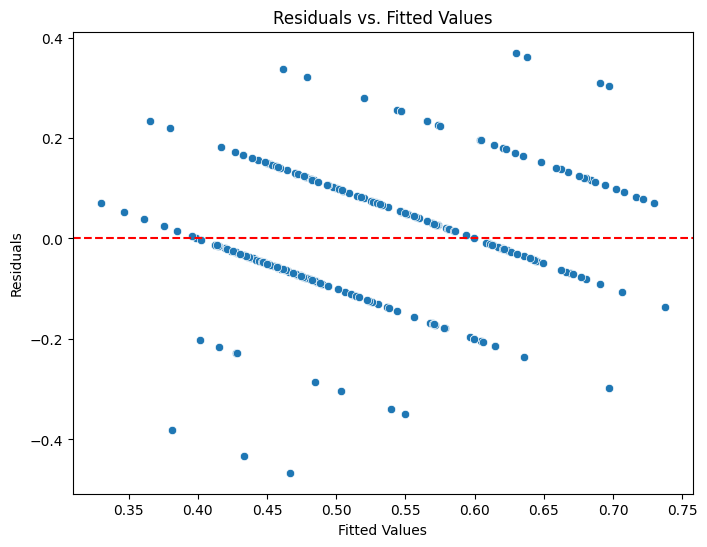

In [32]:
residuals = y_test - y_pred

# Plot residuals vs. fitted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

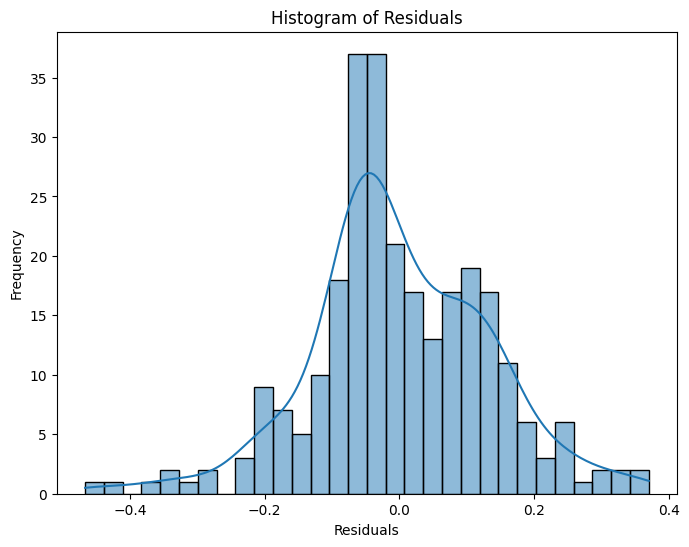

In [33]:
# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

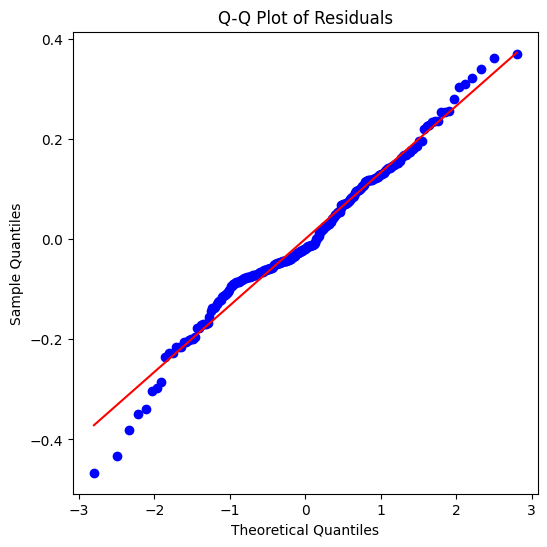

In [35]:
# Q-Q plot of residuals
plt.figure(figsize=(6, 6))
st.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

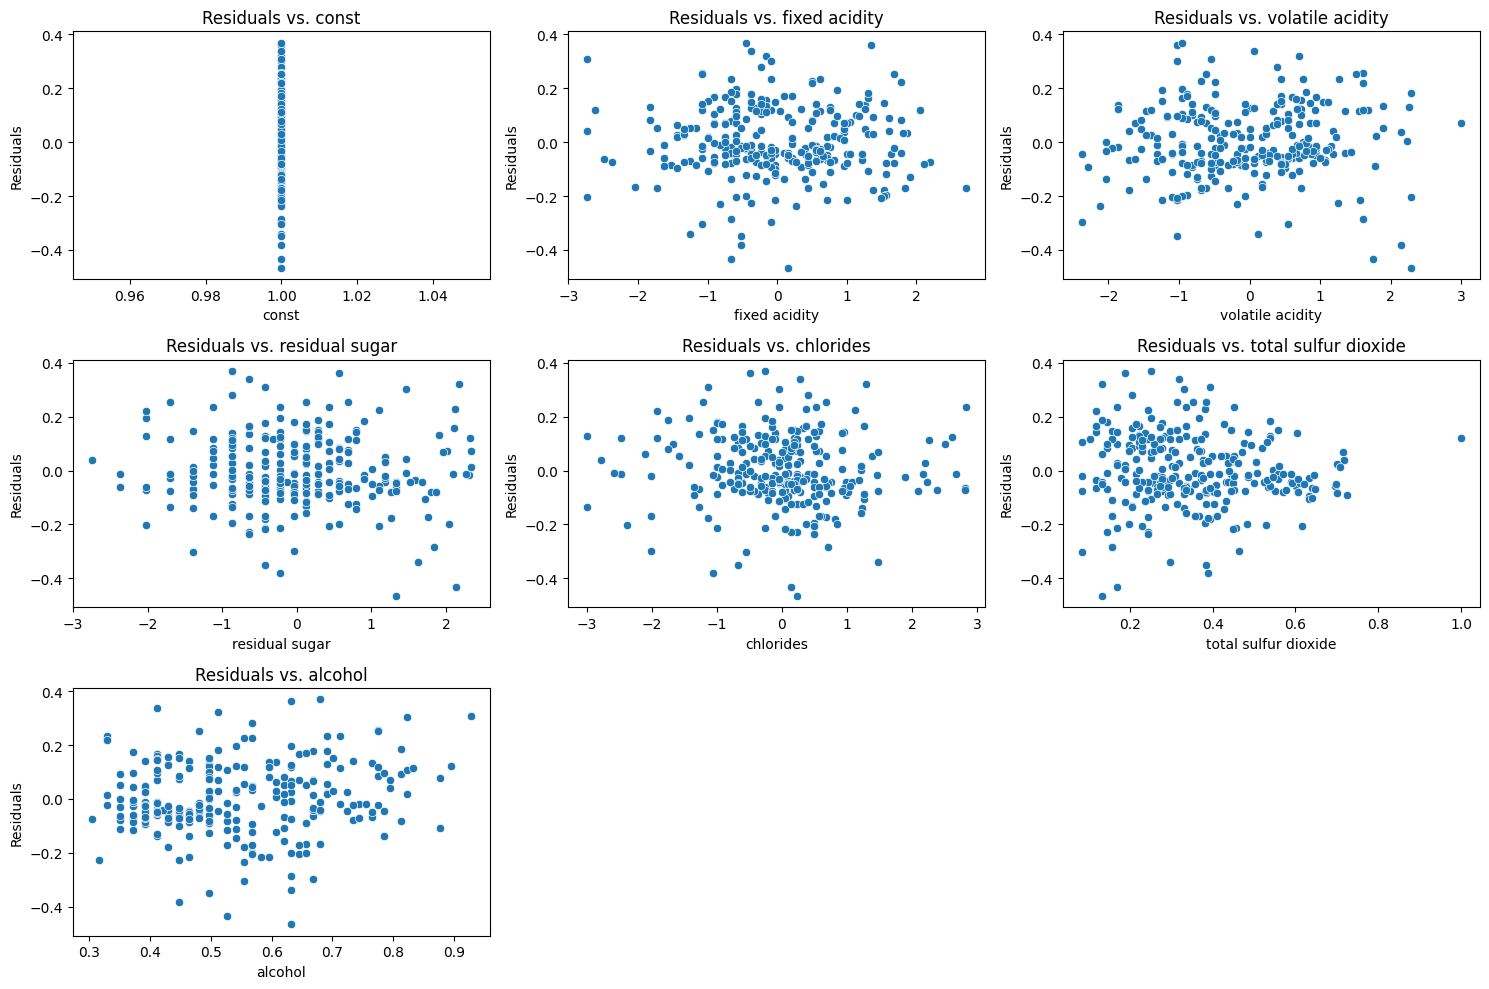

In [36]:
features = X_test.columns
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=X_test[feature], y=residuals)
    plt.title(f'Residuals vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Residuals')
plt.tight_layout()
plt.show()